In [1]:
# Import statements

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split

/home/borra/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=False):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [3]:
# For extracting spatial features
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [4]:
# For extracting color histograms
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [5]:
# Define a function to extract features from a list of images
# Modified implementation from classroom that combines HOG + Spatial features + Color Histogram
def extract_features(imgs, cspace='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0, spatial_size=(32, 32), hist_bins=32):
    # Create a list to append feature vectors to

    features = []
    
    print ("total images to train = ", len(imgs))

    # Iterate through the list of images
    for file in imgs:
        
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)     
            
        # Add spatial features & hist features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        file_features.append(spatial_features)
        hist_features = color_hist(feature_image, nbins=hist_bins)
        
        file_features.append(hist_features)

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append all the different features to the features list
        file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

Total Car Images => 8792


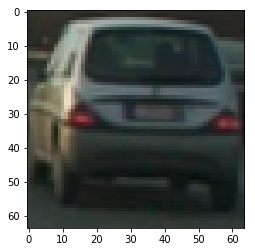

In [6]:
cars = glob.glob('vehicles/**/*.png', recursive=True)
print('Total Car Images =>',len(cars))
# Random Car image
image = mpimg.imread(cars[799])
plt.imshow(image)
plt.show()


Total notCar Images => 8968


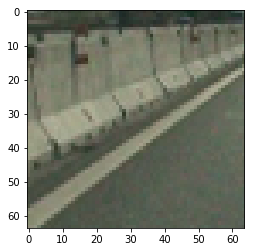

In [7]:
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)
print('Total notCar Images =>',len(notcars))
# Random Non-Car image
image = mpimg.imread(notcars[399])
plt.imshow(image)
plt.show()

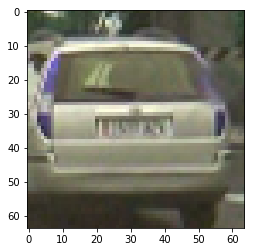

In [8]:
# Random Car image
image = cv2.imread(cars[666])
plt.imshow(image)
plt.show()

/home/borra/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


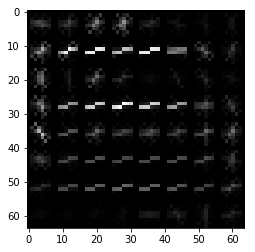

In [9]:
image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY)
features, hog_image = hog(image, 9, (8,8), (2,2), visualise=True, feature_vector=True)
plt.imshow(hog_image, cmap='gray')
plt.show()

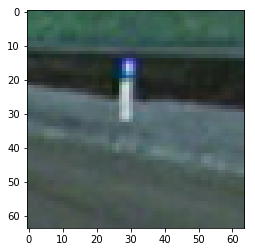

In [10]:
# Random Car image
notcarimage = cv2.imread(notcars[455])
plt.imshow(notcarimage)
plt.show()

/home/borra/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


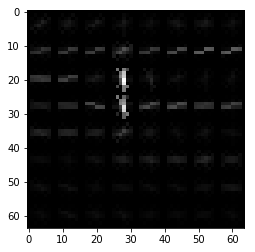

In [11]:
image = cv2.cvtColor( notcarimage, cv2.COLOR_RGB2GRAY)
features, hog_image = hog(image, 9, (8,8), (2,2), visualise=True, feature_vector=True)
plt.imshow(hog_image, cmap='gray')
plt.show()

In [12]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32,32)
hist_bins = 32

t=time.time()
car_features = extract_features(cars, cspace=color_space, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_size=spatial_size, hist_bins=hist_bins)
notcar_features = extract_features(notcars, cspace=color_space, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_size=spatial_size, hist_bins=hist_bins)

t2 = time.time()
print(round(t2-t, 2), 'Seconds taken to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rndm_st = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rndm_st)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell', cell_per_block,'cells per block', spatial_size, 'spatial_size and',
     hist_bins, 'hist_bins')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds taken to train SVC...')


total images to train =  8792


/home/borra/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


total images to train =  8968
192.59 Seconds taken to extract HOG features...
Using: 9 orientations 8 pixels per cell 2 cells per block (32, 32) spatial_size and 32 hist_bins
Feature vector length: 8460
25.33 Seconds taken to train SVC...


In [13]:
# Save our training data weights
import pickle

pickle.dump(svc, open( "svc.p", "wb" ) )
pickle.dump(X_scaler, open("scaler.p", "wb"))
print ("Saved pickle")

Saved pickle


In [14]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Test Accuracy of SVC =  0.9932
My SVC predicts:  [ 1.  1.  0.  1.  0.  1.  0.  1.  1.  0.]
For these 10 labels:  [ 1.  1.  0.  1.  0.  1.  0.  1.  1.  0.]
0.00242 Seconds to predict 10 labels with SVC


In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

import numpy as np
import cv2
from skimage.feature import hog

In [16]:
# Color conversion helper function
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

In [17]:
# Define a single function that can extract features using hog sub-sampling and make predictions
# Modified implementation to support multiple scales in single search
def find_cars(img, ystart, ystop, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    scale_choose = [1.3, 1.5, 1.8] # Different scales that we're going to use
    draw_img = np.copy(img)
    heatmap = np.zeros_like(img[:,:,0])
    img = img.astype(np.float32)/255
    for scale in scale_choose:
        img_tosearch = img[ystart:ystop,:,:]
        ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
        if scale != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1 
        nfeat_per_block = orient*cell_per_block**2
        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        window = 64
        nblocks_per_window = (window // pix_per_cell)-1 
        
        # Define cells per step based on the scale of the image...larger scale needs more cells
        if scale == 1.8:
            cells_per_step = 3
        else:
            cells_per_step = 2
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step

        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                hist_features = color_hist(subimg, nbins=hist_bins)

                # Scale features and make a prediction
                test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
                #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
                test_prediction = svc.predict(test_features)

                if test_prediction == 1:
                    xbox_left = np.int(xleft*scale)
                    ytop_draw = np.int(ytop*scale)
                    win_draw = np.int(window*scale)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                    
                    # Heatmap implementation to help in determining heat map (part of next function)
                    heatmap[ytop_draw+ystart:ytop_draw+win_draw+ystart, xbox_left:xbox_left+win_draw] += 1

    return draw_img, heatmap

/home/borra/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


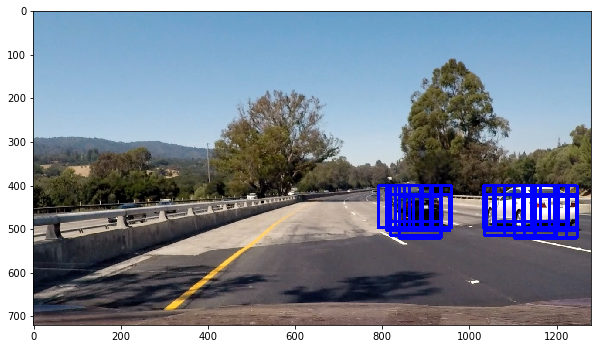

In [18]:
# import our saved svm object
#Commented out - uncomment for debug purposes
svc =  pickle.load( open( "svc.p", "rb" ) )
X_scaler = pickle.load(open( "scaler.p", "rb" ))
spatial_size =(32,32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
ystart = 400
ystop = 656
scale = 1.5

img = mpimg.imread('test_images/test4.jpg')
    
out_img, heatmap = find_cars(img, ystart, ystop, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.figure(figsize=(10,10))
plt.imshow(out_img)
plt.show()

In [19]:
from scipy.ndimage.measurements import label

In [20]:
# HEat map functions - taken from the classroom
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap

In [21]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

In [22]:
def draw_labeled_bboxes(img, labels):
    boxes = []
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
        boxes.append(bbox)
    # Return the image and the bound boxes
    return img, boxes

/home/borra/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


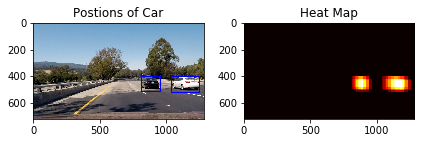

In [23]:
# import our saved svm object
svc =  pickle.load( open( "svc.p", "rb" ) )
X_scaler = pickle.load(open( "scaler.p", "rb" ))
spatial_size =(32,32)
hist_bins = 32
orient = 9
pix_per_cell = 8
cell_per_block = 2
ystart = 400
ystop = 656

# Read in image similar to one shown above 
img = mpimg.imread('test_images/test4.jpg')
out_img, heatmap = find_cars(img, ystart, ystop, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

# Apply threshold to help remove false positives
heat = apply_threshold(heatmap,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img, bbox = draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Postions of Car')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

plt.show()

In [24]:
class cars_detect():
    def __init__(self):
        #Previous frames heatmaps
        self.heatmap = np.array([None]*10)
        #first frame 
        self.first_frame_flag = True
        self.smoothen = 10 # Number of frames to smoothen our video
global vehicle_detected # Used to identify if existing car already present
detected_vehicle = cars_detect()

In [25]:
# import our saved svm object
svc =  pickle.load( open( "svc.p", "rb" ) )
X_scaler = pickle.load(open( "scaler.p", "rb" ))

In [26]:
# Actual pipeline to process our image
def image_pipeline(image):
    
    # Basic parameters - probably better to parameterize to avoid issues
    # as using incorrect parameters can lead to major breaks in the code
    orient = 9
    pix_per_cell = 8
    cell_per_block = 2
    spatial_size = (32,32)
    hist_bins = 32
    ystart = 400
    ystop = 656

    # Get the output image along with the heatmap
    out_img, heatmap = find_cars(image, ystart, ystop, svc, X_scaler, 
                                 orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
    # Are we detecting vehicle for the 1st time?
    if detected_vehicle.first_frame_flag == True:
        # Yes, then our confidence level is low and reflected in the next few lines
        applied_threshold = apply_threshold(np.copy(heatmap), 1)
        #make the history same as the first frame
        detected_vehicle.heatmap = np.array([applied_threshold] * detected_vehicle.smoothen)
        detected_vehicle.first_frame_flag = False
        labels = label(applied_threshold)
    else:    
        # our confidence is pretty high, so we can use previous frames to determine
        # if it's really a car or a false positive
        detected_vehicle.heatmap[0:-1] = detected_vehicle.heatmap[1:]
        detected_vehicle.heatmap[-1] = heatmap
        new_previous_frame_threshold = detected_vehicle.heatmap.sum(axis=0)

        # Smoothing function - harcoded values based on some experimaentation
        applied_threshold = apply_threshold(np.copy(new_previous_frame_threshold), detected_vehicle.smoothen*2+5)
        labels = label(applied_threshold)
        
    # Get our labeled box smoothen
    draw_img_labeled, bbox = draw_labeled_bboxes(np.copy(image), labels)
    
    #Apply additional "heat" to our existing heatmap
    detected_vehicle.heatmap[-1] = add_heat(detected_vehicle.heatmap[-1], bbox)

    return draw_img_labeled


/home/borra/anaconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


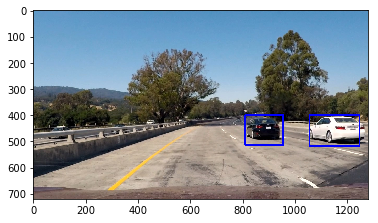

In [27]:
# Single Image Proceesing output
img = mpimg.imread('test_images/test1.jpg')

out_image = image_pipeline(img)

plt.imshow(out_image)
plt.show()

In [28]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [29]:
def process_image(image):
    result = image_pipeline(image)
    return result

In [30]:
output_clip = 'project_video_result.mp4'
input_clip = VideoFileClip("project_video.mp4")
clip = input_clip.fl_image(process_image)
%time clip.write_videofile(output_clip, audio=False)

[MoviePy] >>>> Building video project_video_result.mp4
[MoviePy] Writing video project_video_result.mp4


100%|█████████▉| 1260/1261 [21:49<00:01,  1.04s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_result.mp4 

CPU times: user 2h 12min 38s, sys: 1min 12s, total: 2h 13min 50s
Wall time: 21min 50s


In [31]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_clip))